In [71]:
path = "Result/pretrain/protein_family_subtilis.log"

MLMloss=[]
CLSloss=[]

with open(path) as f:
    for line in f:
        MLMloss.append(float(line[22:28]))
        CLSloss.append(float(line[34:40]))
print(MLMloss)
print(CLSloss)

[]
[]


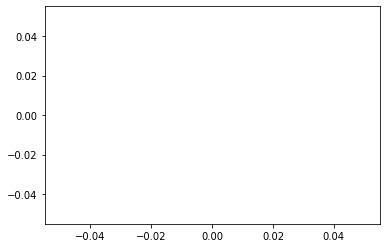

In [72]:
import matplotlib.pyplot as plt
x = MLMloss
plt.plot(x,color='#ff7f00');

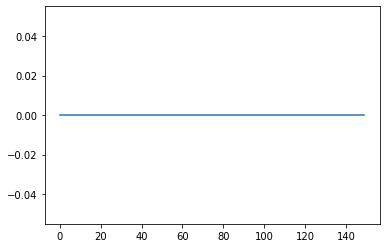

In [32]:
import matplotlib.pyplot as plt
x = CLSloss
plt.plot(x);

In [46]:
import torch
model = torch.load("../thesis_code/Result/pretrain/protein_family_thuringiensis.pt")

model

In [51]:
model.keys()

dict_keys(['model', 'optimizer', 'amp'])

In [53]:
model['model'].keys()

odict_keys(['embedding.weight', 'layers.0.fn.fn.proj_in.0.weight', 'layers.0.fn.fn.proj_in.0.bias', 'layers.0.fn.fn.sgu.w', 'layers.0.fn.fn.sgu.b', 'layers.0.fn.fn.sgu.norm.weight', 'layers.0.fn.fn.sgu.norm.bias', 'layers.0.fn.fn.proj_out.weight', 'layers.0.fn.fn.proj_out.bias', 'layers.0.fn.norm.weight', 'layers.0.fn.norm.bias', 'layers.1.fn.fn.proj_in.0.weight', 'layers.1.fn.fn.proj_in.0.bias', 'layers.1.fn.fn.sgu.w', 'layers.1.fn.fn.sgu.b', 'layers.1.fn.fn.sgu.norm.weight', 'layers.1.fn.fn.sgu.norm.bias', 'layers.1.fn.fn.proj_out.weight', 'layers.1.fn.fn.proj_out.bias', 'layers.1.fn.norm.weight', 'layers.1.fn.norm.bias', 'layers.2.fn.fn.proj_in.0.weight', 'layers.2.fn.fn.proj_in.0.bias', 'layers.2.fn.fn.sgu.w', 'layers.2.fn.fn.sgu.b', 'layers.2.fn.fn.sgu.norm.weight', 'layers.2.fn.fn.sgu.norm.bias', 'layers.2.fn.fn.proj_out.weight', 'layers.2.fn.fn.proj_out.bias', 'layers.2.fn.norm.weight', 'layers.2.fn.norm.bias', 'layers.3.fn.fn.proj_in.0.weight', 'layers.3.fn.fn.proj_in.0.bias', 

In [61]:
weight = model['model'][ 'to_logits.1.weight'] #decoderの重み
weight.shape

torch.Size([67, 512])

In [65]:
weight

tensor([[-0.0089,  0.1539, -0.0412,  ..., -0.1274,  0.1990,  0.1659],
        [-0.0406, -0.0315, -0.0398,  ..., -0.0746, -0.0753, -0.0217],
        [ 0.1025,  0.0839,  0.0374,  ..., -0.0144,  0.0416,  0.0921],
        ...,
        [ 0.0276, -0.0585, -0.0176,  ..., -0.2439, -0.0840, -0.0309],
        [-0.0035,  0.1573, -0.0391,  ..., -0.1177,  0.1995,  0.1743],
        [-0.0085,  0.1608, -0.0457,  ..., -0.1221,  0.1924,  0.1769]],
       device='cuda:0')

In [62]:
import torch
import torch.nn as nn
decoder = nn.Sequential(
            nn.LayerNorm(67),
            nn.Linear(67, 512)
        )

In [63]:
decoder = weight

In [64]:
decoder

tensor([[-0.0089,  0.1539, -0.0412,  ..., -0.1274,  0.1990,  0.1659],
        [-0.0406, -0.0315, -0.0398,  ..., -0.0746, -0.0753, -0.0217],
        [ 0.1025,  0.0839,  0.0374,  ..., -0.0144,  0.0416,  0.0921],
        ...,
        [ 0.0276, -0.0585, -0.0176,  ..., -0.2439, -0.0840, -0.0309],
        [-0.0035,  0.1573, -0.0391,  ..., -0.1177,  0.1995,  0.1743],
        [-0.0085,  0.1608, -0.0457,  ..., -0.1221,  0.1924,  0.1769]],
       device='cuda:0')

In [70]:

import numpy as np
import glob
import re
import os

path="./CDSdata"
fastas = glob.glob(os.path.join(path, 'GCF_000009045.1_ASM904v1_cds_from_genomic.fna'))
fastas

['./CDSdata/GCF_000009045.1_ASM904v1_cds_from_genomic.fna']

In [75]:
path="./CDSdata"
fastas = glob.glob(os.path.join(path, 'GCF_000009045.1_ASM904v1_cds_from_genomic.fna'))
for fasta in fastas:
    print(fasta)

./CDSdata/GCF_000009045.1_ASM904v1_cds_from_genomic.fna
